# The Factors for Prosper Loan Borrower's Interest Rate 
## by Jacky Wang

## Investigation Overview

In this investigation, my main focus would be interested in knowing what factors contribute to the decision of borrower's interest rate for Prosper loan applications.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Twelve promising features are chosen to do the analysis. Outliers were trimmed leaving 56,639 loans in the dataset to having a more generalized outcome. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
loans.rename(columns={'ProsperRating (numeric)': 'ProsperRating'}, inplace=True)

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'ProsperRating': [7., 6., 5., 4., 3., 2., 1.],
                    'ProsperScore': [10., 9., 8., 7., 6., 5., 4., 3., 2., 1.],
                    'Term': [12, 36, 60]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [4]:
numeric_vars = ['BorrowerRate', 'EmploymentStatusDuration', 
                'CreditScoreRangeLower', 'DebtToIncomeRatio', 
                'StatedMonthlyIncome', 'LoanOriginalAmount', 
                'MonthlyLoanPayment', 'Investors']
categoric_vars = ['Term', 'ProsperRating', 'ProsperScore']

In [5]:
# Keep the bulk part of the data for more generalized analysis
loans = loans[loans.EmploymentStatusDuration < 200]
loans = loans[(loans.CreditScoreRangeLower > 550) & (loans.CreditScoreRangeLower < 800)]
loans = loans[loans.DebtToIncomeRatio < 0.5]
loans = loans[loans.StatedMonthlyIncome < 8000]
loans = loans[loans.LoanOriginalAmount <= 25000]
loans = loans[loans.MonthlyLoanPayment < 500]

## Distribution of Interest Rate

The interest rate appears mostly similar to normal distribution, despite a few spikes on the high ends.

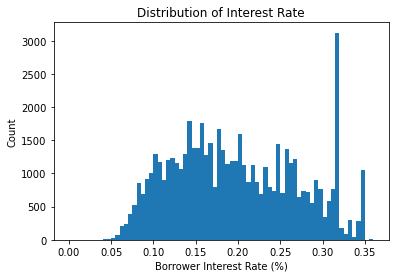

In [6]:
bin_edges = np.arange(0, 0.36+0.005, 0.005)
plt.hist(x=loans.BorrowerRate, bins=bin_edges)
plt.title('Distribution of Interest Rate')
plt.xlabel('Borrower Interest Rate (%)')
plt.ylabel('Count');

## The Distribution of Credit Score

The credit score is the credit of the borrowers, which was pulled from the credit bureau when loan is applied. I found this to be one of the important factors that has direct impact on the interest rate. The distribution is centered around 650 to 700.

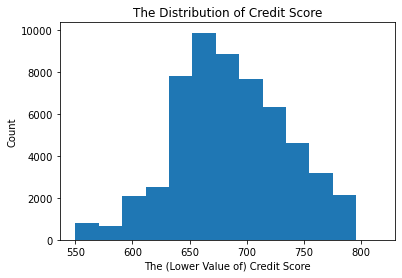

In [7]:
bin_edges = np.arange(550, 800+20.5, 20.5)
plt.hist(x=loans.CreditScoreRangeLower, bins=bin_edges);
plt.title('The Distribution of Credit Score')
plt.xlabel('The (Lower Value of) Credit Score')
plt.ylabel('Count');

## Interest Rate vs. Borrower's Credit Score

Since interest rate and borrower's credit score are distributed roughly normal, we can plot them using scatter plot to see the trends without any transformations. We can also notice that the credit scores tends to be discrete values.

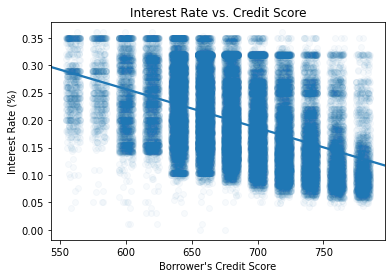

In [8]:
sns.regplot(data=loans, x='CreditScoreRangeLower', 
            y='BorrowerRate', x_jitter=5.5,
            truncate=False, scatter_kws={'alpha': 0.03});
plt.title('Interest Rate vs. Credit Score');
plt.xlabel("Borrower's Credit Score")
plt.ylabel('Interest Rate (%)');

## Interest Rate vs. Categorical Features

I found that all the selected categorical variables - Term, Prosper Score, and Prosper Rate - have impact on the interest rate, and the impact is more consistent than the credit score. Among three of them, the "ProsperRating" appears to have most direct impact on the interst rate.

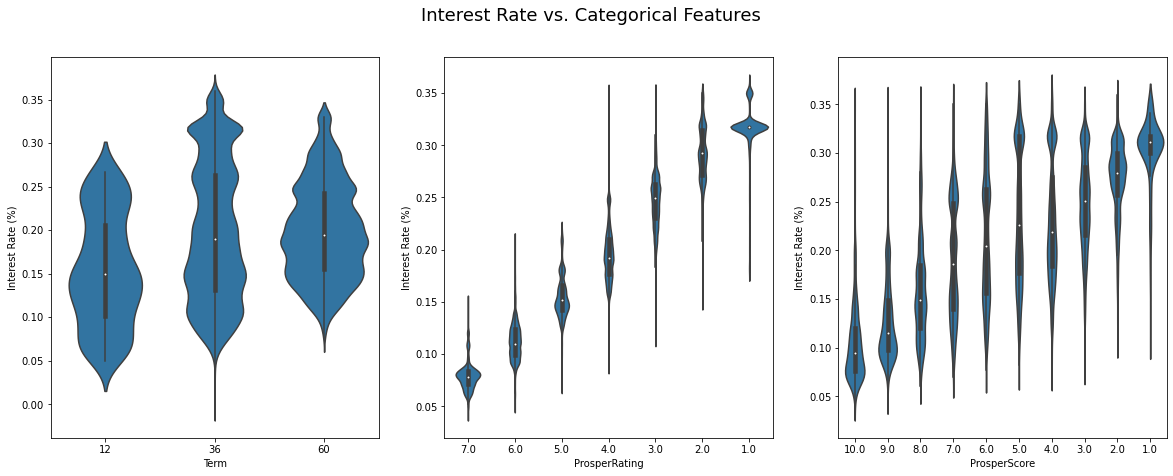

In [9]:
# plot the categorical variables against price again, this time with full data
default_color = sns.color_palette()[0]
fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [20, 7])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = loans, x = var, y = 'BorrowerRate', ax = ax[i],
                  color = default_color);
    ax[i].set_ylabel('Interest Rate (%)');
plt.suptitle('Interest Rate vs. Categorical Features', fontsize=18);


## Interest Rate by Prosper Score and Term

I also plot the interest rate in terms of two categorical variables "ProsperScore" and "Term". The interest rate tends to consistently increase with the increase of the Proser scores. However, the variation is quite high at each Prosper Score.

And it is also interesting to see that the interest rate is positive correlated with loan terms when "ProsperScore" is high (from 10 to 7); however after 7, the interest rate is not correlated with the interest rate anymore. We can conclude that when the risk is high, the interest rate is mostly dominated by the risk.

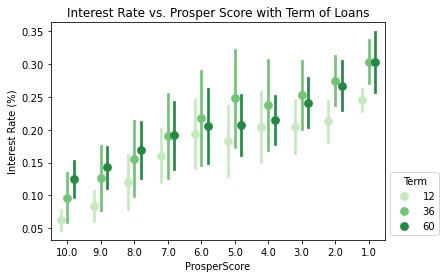

In [10]:
sns.pointplot(data=loans, 
           x='ProsperScore', 
           y='BorrowerRate', 
           hue='Term',
           palette='Greens',
           linestyles='', ci='sd', dodge=0.4) 
plt.legend(loc=3, bbox_to_anchor=(1, 0), title='Term')
plt.title("Interest Rate vs. Prosper Score with Term of Loans")
plt.ylabel('Interest Rate (%)');

## Interest Rate by Prosper Rating and Term
I also plot the interest rate in terms of two categorical variables "ProsperRating" and "Term". We can see that "ProsperRating" has better control over the inerest rate in terms of the smaller variation it shows. And again, the interest rate consistently increases with Term only up to where the Prosper Rating is 4, after that, they are not much correlated.

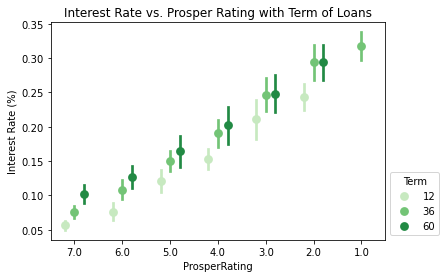

In [11]:
sns.pointplot(data=loans, 
           x='ProsperRating', 
           y='BorrowerRate', 
           hue='Term',
           palette='Greens',
           linestyles='', ci='sd', dodge=0.4) 
plt.legend(loc=3, bbox_to_anchor=(1, 0), title='Term');
plt.title("Interest Rate vs. Prosper Rating with Term of Loans")
plt.ylabel('Interest Rate (%)');

In [12]:
!jupyter nbconvert "slide_deck.ipynb" --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 849745 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 5